# Week‑3 CIFAR‑10 – Full Teaching Practical Notebook

## 🎯 Learning Goals
This notebook teaches image classification with CNN using CIFAR‑10.
You will:
- Load dataset
- Visualize samples
- Build CNN
- Train (1 epoch)
- Plot Accuracy & Loss
- Generate Confusion Matrix + Report
- Save Model
- Upload Image → Predict

## 1️⃣ Import Libraries & Install Requirements

In [ ]:
!pip install tensorflow scikit-learn matplotlib --quiet

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import cv2

## 2️⃣ Load CIFAR‑10 Dataset

In [ ]:
(train_X, train_y), (test_X, test_y) = datasets.cifar10.load_data()
train_X, test_X = train_X/255.0, test_X/255.0
class_names=['airplane','car','bird','cat','deer','dog','frog','horse','ship','truck']
train_X.shape, test_X.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


((50000, 32, 32, 3), (10000, 32, 32, 3))

## 👀 Show Sample Images

/tmp/ipython-input-4014176968.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(train_y[i])])


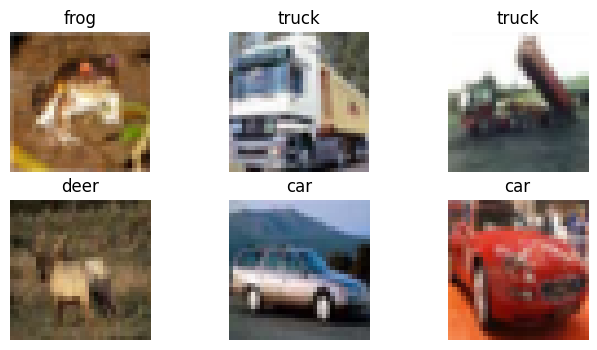

In [ ]:
plt.figure(figsize=(8,4))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(train_X[i])
    plt.title(class_names[int(train_y[i])])
    plt.axis('off')
plt.show()

## 🧱 3️⃣ Build CNN Architecture

In [ ]:
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

## ⚙️ 4️⃣ Compile & Train (epoch=1)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_X,train_y,epochs=5,validation_split=0.2)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 56s 43ms/step - accuracy: 0.5682 - loss: 1.2175 - val_accuracy: 0.5949 - val_loss: 1.1555
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.6361 - loss: 1.0591 - val_accuracy: 0.6434 - val_loss: 1.0299
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 55s 44ms/step - accuracy: 0.6634 - loss: 0.9653 - val_accuracy: 0.6558 - val_loss: 0.9959
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 57s 46ms/step - accuracy: 0.6927 - loss: 0.9004 - val_accuracy: 0.6586 - val_loss: 0.9891
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 44ms/step - accuracy: 0.7030 - loss: 0.8530 - val_accuracy: 0.6754 - val_loss: 0.9552


## 📊 5️⃣ Plot Accuracy & Loss Curves

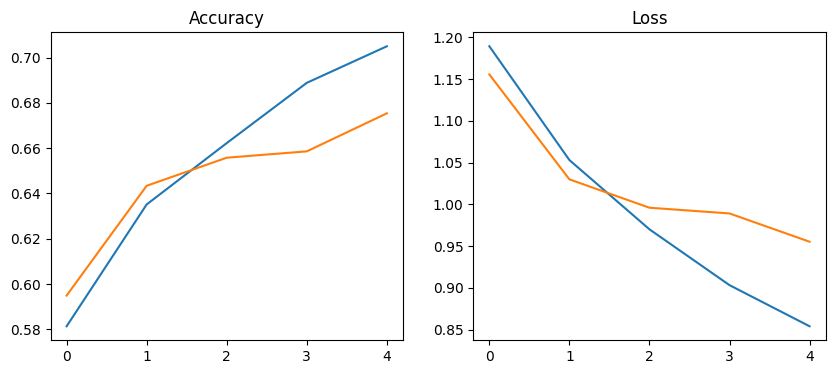

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.plot(history.history['accuracy']); plt.plot(history.history['val_accuracy']); plt.title('Accuracy')
plt.subplot(1,2,2); plt.plot(history.history['loss']); plt.plot(history.history['val_loss']); plt.title('Loss')
plt.show()

## 🧪 6️⃣ Evaluate – Confusion Matrix & Classification Report

In [ ]:
pred = np.argmax(model.predict(test_X),axis=1)
true = test_y.flatten()
cm = confusion_matrix(true,pred)
print(classification_report(true,pred,target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
              precision    recall  f1-score   support

    airplane       0.73      0.68      0.70      1000
         car       0.81      0.83      0.82      1000
        bird       0.51      0.60      0.55      1000
         cat       0.52      0.47      0.49      1000
        deer       0.65      0.59      0.62      1000
         dog       0.56      0.60      0.58      1000
        frog       0.78      0.75      0.77      1000
       horse       0.76      0.73      0.74      1000
        ship       0.77      0.80      0.78      1000
       truck       0.76      0.77      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



## 💾 7️⃣ Save Model

In [ ]:
model.save('cnn_cifar10_full.h5')

## 📤 8️⃣ Upload Your Own Image & Predict

In [ ]:
from google.colab import files
up = files.upload()
if up:
    fname=list(up.keys())[0]
    img=cv2.imread(fname)
    img=cv2.resize(img, (32,32))
    arr=np.array(img)/255.0
    pred_class=np.argmax(model.predict(arr.reshape(1,32,32,3)))
    print('Prediction:', class_names[pred_class])

Saving airplane.png to airplane.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
Prediction: airplane


## ASSIGNMENT
Fashion MNIST